In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [7]:
ls

 Volume in drive F has no label.
 Volume Serial Number is 40D5-FD63

 Directory of F:\MLP\Feature_Selection

01/06/2020  03:35 PM    <DIR>          .
01/06/2020  03:35 PM    <DIR>          ..
09/02/2019  03:27 PM                42 .gitattributes
01/06/2020  03:20 PM    <DIR>          .ipynb_checkpoints
01/06/2020  11:08 AM    <DIR>          datasets
01/06/2020  03:35 PM             1,423 Feature Selection Based on Mutual Information(Entropy) Gain for Classification and Regression.ipynb
01/06/2020  03:31 PM           205,268 Feature Selection with Filtering Method- Constant, Quasi Constant and Duplicate Feature Removal and Correlation.ipynb
09/02/2019  03:27 PM               134 paribas.csv
09/02/2019  03:27 PM               222 README.md
09/02/2019  03:27 PM        59,054,007 santander-test.csv
09/02/2019  03:27 PM        59,362,806 santander-train.csv
               7 File(s)    118,623,902 bytes
               4 Dir(s)  41,488,089,088 bytes free


### Mutual Information Gain for Classification Problem

In [8]:
data = pd.read_csv('datasets/santander-train.csv', nrows=20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [9]:
X = data.drop('TARGET', axis=1)
y = data['TARGET']

In [11]:
X.shape, y.shape

((20000, 370), (20000,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

### Remove Constant, quasi Constant, duplicate features

In [14]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [15]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [17]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [18]:
X_train_T.duplicated().sum()

18

In [19]:
dup_features = X_train_T.duplicated()

In [20]:
features_non_dup = [not i for i in dup_features]

In [22]:
X_train_unique = X_train_T[features_non_dup].T
X_test_unique = X_test_T[features_non_dup].T

In [24]:
X_train_unique.head()

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,17282.0,2.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63200.700000
1,38270.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88640.610000
2,31526.0,2.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96314.160000
3,38737.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117568.020000
4,16469.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [25]:
X_train_unique.shape, X_test_unique.shape

((16000, 227), (4000, 227))

### Calculate Mutual Information

In [26]:
mi = mutual_info_classif(X_train_unique, y_train)

In [27]:
len(mi)

227

In [28]:
mi.max()

0.013766402153474688

In [30]:
mi = pd.Series(mi)
mi.index = X_train_unique.columns

In [31]:
mi.sort_values(ascending=False, inplace=True)

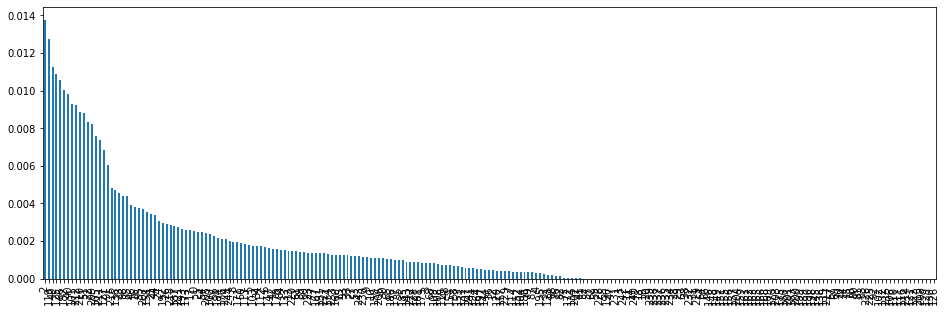

In [34]:
mi.plot.bar(figsize=(16,5))

In [36]:
selector = SelectPercentile(mutual_info_classif, percentile=15).fit(X_train_unique, y_train)
X_train_unique.columns[selector.get_support()]

Int64Index([  0,   2,  21,  22,  27,  40,  46,  49,  50,  51,  55,  58,  85,
             86,  91,  95,  98, 100, 101, 103, 105, 111, 119, 125, 127, 163,
            165, 180, 182, 187, 209, 210, 211, 212],
           dtype='int64')

In [37]:
len(X_train_unique.columns[selector.get_support()])

34

In [41]:
X_train_mi = selector.transform(X_train_unique)
X_test_mi = selector.transform(X_test_unique)

In [43]:
X_train_mi.shape, X_test_mi.shape

((16000, 34), (4000, 34))

### Model Building

In [46]:
def random_forest(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy_score : ',accuracy_score(y_test, y_pred))

In [48]:
%%time
random_forest(X_train_mi, X_test_mi, y_train, y_test)

Accuracy_score :  0.95075
Wall time: 583 ms


In [50]:
%%time
random_forest(X_train_unique, X_test_unique, y_train, y_test)

Accuracy_score :  0.95875
Wall time: 1.03 s


In [53]:
%%time
random_forest(X_train, X_test, y_train, y_test)

Accuracy_score :  0.9585
Wall time: 1.27 s


### Mutual Information Gain for Regression Problem

In [54]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [55]:
boston = load_boston()

In [56]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [60]:
X = pd.DataFrame(data = boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [61]:
y = boston.target

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [63]:
mi = mutual_info_regression(X_train, y_train)

In [64]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False, inplace=True)

In [65]:
mi

LSTAT      0.674099
RM         0.559356
INDUS      0.508989
PTRATIO    0.477072
NOX        0.441975
TAX        0.388835
CRIM       0.361731
AGE        0.341264
DIS        0.321732
ZN         0.209447
RAD        0.200124
B          0.145569
CHAS       0.012708
dtype: float64

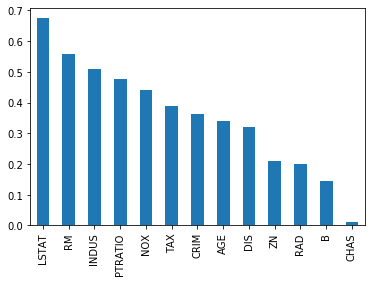

In [67]:
mi.plot.bar()

In [68]:
sel = SelectKBest(mutual_info_regression, k=9).fit(X_train, y_train)
X_train.columns[sel.get_support()]

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [69]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [70]:
r2_score(y_test, y_pred)

0.5892223849182507

In [72]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

5.783509315085135

In [74]:
np.std(y)

9.188011545278203

In [75]:
X_train_sel = sel.transform(X_train)
X_test_sel = sel.transform(X_test)

In [76]:
X_train_sel.shape, X_test_sel.shape

((404, 9), (102, 9))

In [82]:
model_sel = LinearRegression()
model.fit(X_train_sel, y_train)
y_pred_sel = model.predict(X_test_sel)

In [83]:
r2_score(y_test, y_pred_sel)

0.531712760696157

In [84]:
rmse_sel = np.sqrt(mean_squared_error(y_test, y_pred_sel))
rmse

5.783509315085135